### Data description

The dataset contains the following fields:

- time: The timestamp of the earthquake.
- latitude, longitude: The geographical coordinates of the earthquake's epicenter.
- depth: The depth of the earthquake in kilometers.
- mag: The magnitude of the earthquake.
- magType: The method or algorithm used to calculate the preferred magnitude of the earthquake.
- nst: The number of seismic stations that reported P- and S-arrival times for this earthquake.
- gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees).
- dmin: The minimum distance to the source of the earthquake.
- rms: The root-mean-square (RMS) travel time residual, in sec, using all weights.
- net: The ID of a data contributor.
- id: A unique identifier for the earthquake.
- updated: Time when the event was most recently updated.
- place: Description of the location of the earthquake.
- type: Type of seismic event.
- horizontalError, depthError, magError, magNst: Error measurements.
- status: Status of the event (automatic or reviewed).
- locationSource, magSource: Source of location and magnitude data.

In [1]:
import polars as pl
import matplotlib.pyplot as plt


In [2]:
DATA_CSV_PATH = "../data/raw/seismic_data.csv"

### Loading data

In [3]:
train_df = pl.read_csv(DATA_CSV_PATH)

In [4]:
train_df.head()

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
str,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,str,str,str
"""2000-06-30T23:32:26.660Z""",44.269,146.265,72.9,4.9,"""mb""",10.0,null,null,0.84,"""us""","""usp0009vgq""","""2014-11-07T01:10:26.358Z""","""39 km NE of Otrada, Russia""","""earthquake""",null,7.8,null,1.0,"""reviewed""","""us""","""us"""
"""2000-06-30T22:36:47.300Z""",-39.23,177.47,36.0,3.4,"""ml""",14.0,null,null,null,"""us""","""usp0009vgp""","""2014-11-07T01:10:26.356Z""","""23 km SSE of Wairoa, New Zeala…","""earthquake""",null,null,null,null,"""reviewed""","""wel""","""wel"""
"""2000-06-30T22:33:48.400Z""",50.666,6.124,12.6,2.6,"""ml""",8.0,null,null,null,"""us""","""usp0009vgn""","""2014-11-07T01:10:26.354Z""","""0 km ESE of Raeren, Belgium""","""earthquake""",null,null,null,null,"""reviewed""","""ldg""","""ldg"""
"""2000-06-30T22:19:02.440Z""",46.7495,-122.806333,6.287,2.7,"""md""",25.0,66.0,0.3629,0.19,"""uw""","""uw10525148""","""2016-07-23T00:01:11.860Z""","""7 km SE of Bucoda, Washington""","""explosion""",0.028,0.11,0.03,5.0,"""reviewed""","""uw""","""uw"""
"""2000-06-30T20:33:42.010Z""",37.399,141.503,42.1,5.4,"""mwc""",216.0,null,null,0.9,"""us""","""usp0009vgk""","""2022-04-29T18:43:13.619Z""","""45 km ESE of Namie, Japan""","""earthquake""",null,null,null,null,"""reviewed""","""us""","""hrv"""


# Data analysis

#### Number of datapoints

In [5]:
rows = train_df.shape[0]
columns = train_df.shape[1]

print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 788820 rows and 22 columns.


#### Numerical vs Categorical categories

In [6]:
numerical_columns = [col for col, dtype in train_df.schema.items() if dtype in [pl.Int64, pl.Float64]]
categorical_columns = [col for col, dtype in train_df.schema.items() if dtype == pl.Utf8]

print(f"Numerical Columns [{len(numerical_columns)}/{columns})] :", numerical_columns)
print(f"Categorical Columns [{len(categorical_columns)}/{columns}] :", categorical_columns)

Numerical Columns [12/22)] : ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']
Categorical Columns [10/22] : ['time', 'magType', 'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource', 'magSource']


### Numerical Plots

In [7]:
import math
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

def create_histograms(df: pl.DataFrame, numerical_cols: list[str], bins: int = 100) -> None:
    if not numerical_cols:
        return

    n = len(numerical_cols)
    ncols = 4
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))
    axes = np.array(axes).reshape(-1)  # always 1D

    for i, col in enumerate(numerical_cols):
        ax = axes[i]

        s = df.get_column(col).to_numpy()
        s = s[~np.isnan(s)] if np.issubdtype(s.dtype, np.floating) else s

        ax.hist(s, bins=bins)
        ax.set_title(f"Histogram of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    # Remove unused axes if odd number of plots
    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()


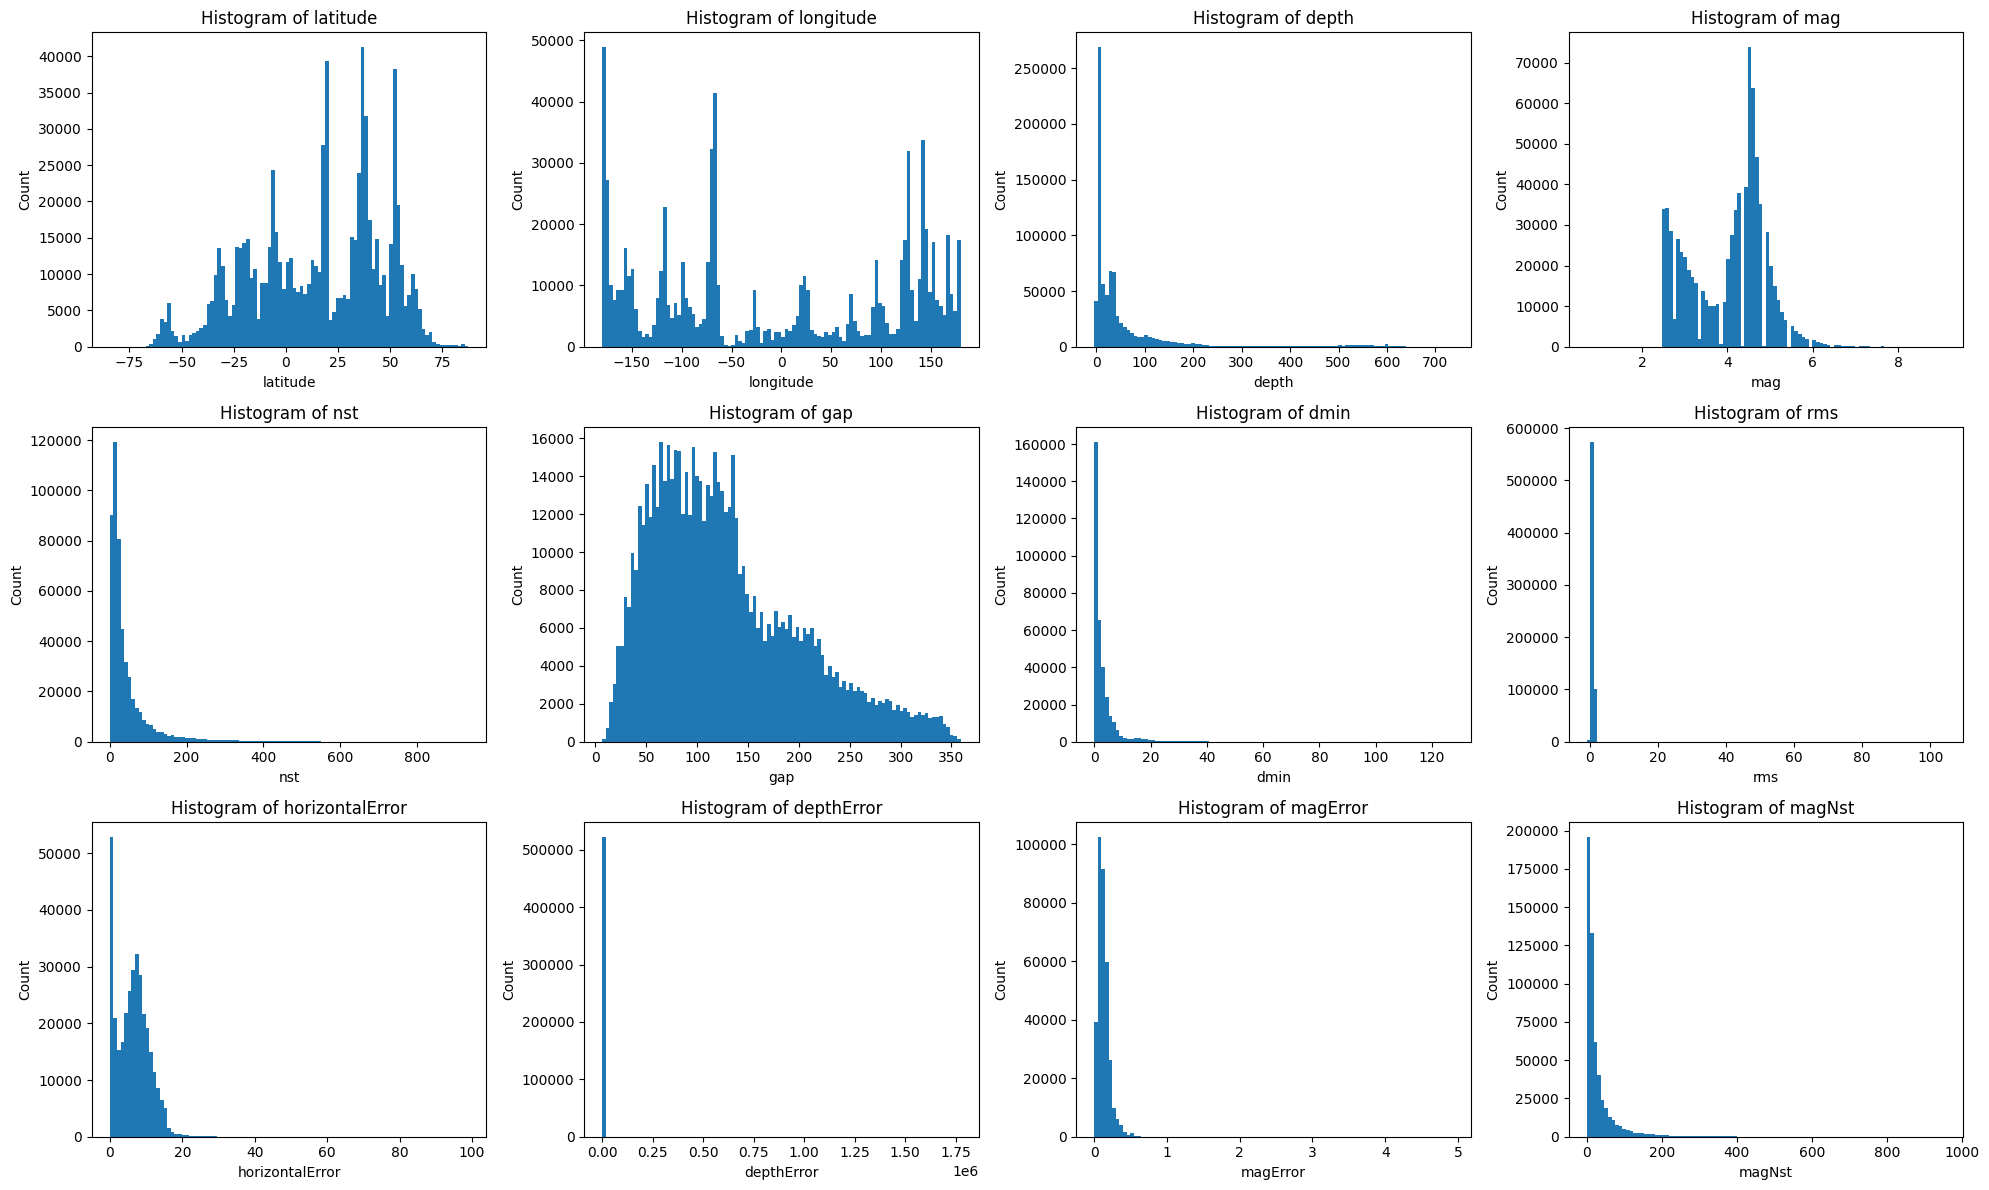

In [8]:
create_histograms(train_df, numerical_columns)

### Categorical data

In [9]:
for column in categorical_columns:
    unique_values = train_df[column].n_unique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'time' has 627130 unique values.
Column 'magType' has 28 unique values.
Column 'net' has 24 unique values.
Column 'id' has 626551 unique values.
Column 'updated' has 440077 unique values.
Column 'place' has 270384 unique values.
Column 'type' has 18 unique values.
Column 'status' has 3 unique values.
Column 'locationSource' has 167 unique values.
Column 'magSource' has 182 unique values.


In [13]:
def _count_unique_values(df: pl.DataFrame, column: str) -> pl.DataFrame:
    index = categorical_columns.index(column)
    for value in train_df[categorical_columns[index]].unique():
        count = train_df.filter(pl.col(categorical_columns[index]) == value).height
        print(f"Value '{value}' occurs {count} times.")

#### status unique values

In [14]:
_count_unique_values(train_df, 'status')

Value 'manual' occurs 11 times.
Value 'automatic' occurs 1805 times.
Value 'reviewed' occurs 787004 times.


#### type unique values

In [15]:
_count_unique_values(train_df, 'type')

Value 'collapse' occurs 1 times.
Value 'Ice Quake' occurs 1 times.
Value 'nuclear explosion' occurs 11 times.
Value 'sonic boom' occurs 6 times.
Value 'mining explosion' occurs 2201 times.
Value 'explosion' occurs 4272 times.
Value 'other event' occurs 119 times.
Value 'landslide' occurs 3 times.
Value 'experimental explosion' occurs 9 times.
Value 'quarry blast' occurs 59 times.
Value 'volcanic eruption' occurs 93 times.
Value 'ice quake' occurs 208 times.
Value 'Rock Slide' occurs 1 times.
Value 'earthquake' occurs 781685 times.
Value 'mine collapse' occurs 14 times.
Value 'rock burst' occurs 134 times.
Value 'acoustic noise' occurs 1 times.
Value 'Landslide' occurs 2 times.


#### magType unique values

In [ ]:
_count_unique_values(train_df, 'magType')

Value 'mc' occurs 392 times.
Value 'Mi' occurs 1 times.
Value 'mlg' occurs 167 times.
Value 'mblg' occurs 2832 times.
Value 'ms_vx' occurs 1 times.
Value 'mb_lg' occurs 1846 times.
Value 'ml' occurs 179201 times.
Value 'md' occurs 90208 times.
Value 'mb' occurs 420687 times.
Value 'mw' occurs 3494 times.
Value 'Unknown' occurs 1 times.
Value 'mlr' occurs 275 times.
Value 'None' occurs 0 times.
Value 'mlv' occurs 11 times.
Value 'Mb' occurs 23 times.
Value 'mww' occurs 21208 times.
Value 'ml(texnet)' occurs 162 times.
Value 'mwr' occurs 11433 times.
Value 'mwp' occurs 16 times.
Value 'Md' occurs 8993 times.
Value 'ms_20' occurs 8 times.
Value 'Ml' occurs 52 times.
Value 'ms' occurs 378 times.
Value 'mwc' occurs 34249 times.
Value 'ma' occurs 4 times.
Value 'm' occurs 7678 times.
Value 'mwb' occurs 5233 times.
Value 'mh' occurs 266 times.


C:\Users\barte\AppData\Local\Temp\ipykernel_6740\1319616279.py:4: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  count = train_df.filter(pl.col(categorical_columns[index]) == value).height


### Detections - timeseries

In [23]:
train_df['time']

time
str
"""2000-06-30T23:32:26.660Z"""
"""2000-06-30T22:36:47.300Z"""
"""2000-06-30T22:33:48.400Z"""
"""2000-06-30T22:19:02.440Z"""
"""2000-06-30T20:33:42.010Z"""
…
"""2000-01-01T07:50:00.390Z"""
"""2000-01-01T05:58:19.780Z"""
"""2000-01-01T05:24:35.290Z"""


#### Select year-month from dataframe

In [38]:
train_df = train_df.with_columns(
    pl.col("time").str.slice(0, 7).alias("year-month")
)

In [39]:
train_df['year-month']

year-month
str
"""2000-06"""
"""2000-06"""
"""2000-06"""
"""2000-06"""
"""2000-06"""
…
"""2000-01"""
"""2000-01"""
"""2000-01"""


#### Plot timeseries

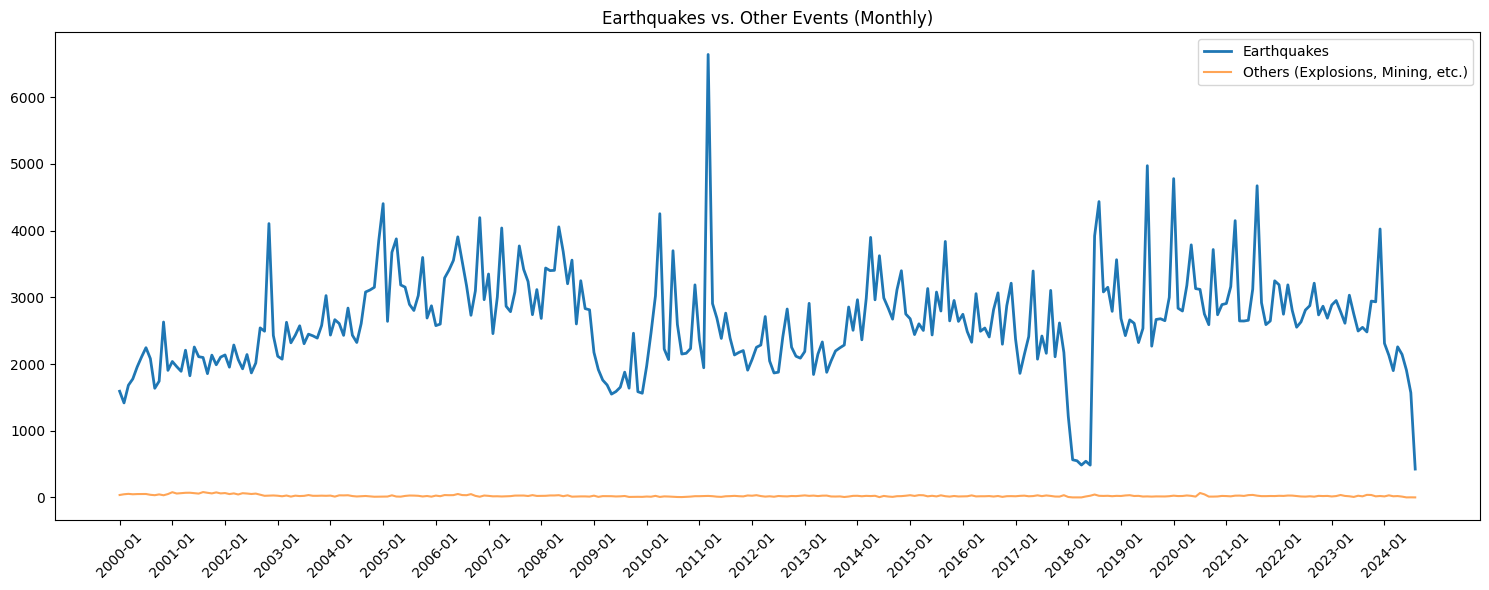

In [52]:
processed_df = train_df.with_columns(
    pl.when(pl.col("type") == "earthquake")
    .then(pl.col("type"))
    .otherwise(pl.lit("other"))
    .alias("type_grouped")
)

agg_df = (
    processed_df
    .group_by(["year-month", "type_grouped"])
    .agg(pl.len().alias("count"))
    .sort("year-month")
)

plot_df = agg_df.pivot(
    index="year-month",
    on="type_grouped",
    values="count"
).fill_null(0).sort("year-month")

# 4. Plot using Matplotlib
plt.figure(figsize=(15, 6))
plt.plot(plot_df["year-month"], plot_df["earthquake"], label="Earthquakes", linewidth=2)
plt.plot(plot_df["year-month"], plot_df["other"], label="Others (Explosions, Mining, etc.)", alpha=0.7)

plt.title("Earthquakes vs. Other Events (Monthly)")
plt.xticks(rotation=45)
plt.gca().set_xticks(plot_df["year-month"][::12])

plt.legend()
plt.tight_layout()
plt.show()